In [1]:
%load_ext autoreload

In [2]:
import sys
sys.path.insert(0, '..')

* https://exofop.ipac.caltech.edu/tess/target.php?id=TOI-5671
* https://exofop.ipac.caltech.edu/tess/target.php?id=TOI-5634

| Telescope | Camera | Filter | Pixel scale | Estimated PSF | Phot. Aper. Rad. | Transit Coverage | Date (UT) |
|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
LCO-Teide (0.4 m) | SBIG 6303 | $z_s$ | 0.57 | 2.4 | 3.7 | ingress |  2022-06-18 |     
LCO-Hal (0.4m) | SBIG 6303 | $z_s$ | 0.57 | 3.7 | 5.5 | full |  2022-06-21 |      
LCO-Hal (2.0m) | MuSCAT3 | g',r',i',$z_s$ | X | X | X | full |  2022-06-30 | 
FWLO (1.0m) | KeplerCam | i' | 0.672 | 2.1 | 4 | full |  2023-01-05 | 
TRAPPIST-North (0.6 m) | Andor ikon-L | I+z | 0.6 | 2.3 | 4.3 | ingress | 2023-01-13| 
Speculoos-North (1.2m) | Andor ikon-L | g' | 0.35 | 1.1 | 5 | full |  2023-01-24 | 
TRAPPIST-North (0.6 m) | Andor ikon-L | I+z | 0.6 | 2.2 | 5 | full | 2023-01-24| 
LCO-McDo (1.0m) | Sinistro | V | 0.389 | 2.04 | 7 | full |  2023-03-26 | 
Speculoos-North (1.2m) | Andor ikon-L | z' | 0.35 | 1.1 | 6 | full |  2023-03-27 | 
Speculoos-North (1.2m) | Andor ikon-L | I$+$z | 0.35 | 0.9 | 10 | full |  2023-04-14 | 
LCO-McDo (1.0m) | Sinistro | g' | 0.389 | - | 8 | full |  2023-04-28 |     
TCS-Teide (1.5 m) | MuSCAT2 | r',i',$z_s$ | X | X | X | full |  2023-05-10 | 
TCS-Teide (1.5 m) | MuSCAT2 | r',i',$z_s$ | X | X | X | full |  2024-02-16 | 

In [51]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.mast import Catalogs

def get_gaia_sources(ra, dec, rad_arcsec=30):
    target_coord = SkyCoord(ra=ra * u.deg, dec=dec * u.deg)
    if rad_arcsec >= 30:
        msg = f'Querying Gaia sources {rad_arcsec}" around '
        msg += f"({ra:.4f}, {dec:.4f}) deg."
        print(msg)
        gaia_sources = Catalogs.query_region(
            target_coord,
            radius=rad_arcsec * u.arcsec,
            catalog="Gaia",
            version=3,
        ).to_pandas()
        gaia_sources["distance"] = gaia_sources[
            "distance"
        ] * u.arcmin.to(u.arcsec)
        gaia_sources = gaia_sources[
        gaia_sources["distance"] <= rad_arcsec
    ]
    assert len(gaia_sources) > 1, "gaia_sources contains single entry"
    return gaia_sources

In [52]:
sources = get_gaia_sources(ra=211.00922, dec=38.618331)

Querying Gaia sources 30": (211.0092, 38.6183) deg.


In [54]:
sources['distance']

0     0.001050
1     6.972838
2    22.227809
Name: distance, dtype: float64

In [3]:
ls ../data/photometry/

filters/
tess_cpm_s16s23s50.csv
tess_eleanor_s16s23s50.csv
TIC119585136-01_20220618_LCO-TEID-0m4_zs_lightcurve.png
TIC119585136-01_20220618_LCO-TEID-0m4_zs_measurements.tbl
TIC119585136-01_20220618_LCO-TEID-0m4_zs_Notes.txt
TIC_119585136-01_20230113_TRAPPIST-North-0.6m_I+z.txt
TIC_119585136.01_20230113_TRAPPIST-North_I+z_and_20230105_KeplerCam_ip_lightcurves.pdf
TIC_119585136-01_20230124_SPECULOOS-North-1.0m_gp_Artemis_measurments.txt
TIC_119585136-01_20230124_TRAPPIST-North-0.6m_I+z_measurments.txt
TIC_119585136-01_20230327_SPECULOOS-North-1m0_z_measurments.txt
TIC23863105-01_20230326_LCO-McD-1m0_V_lightcurve.png
TIC23863105-01_20230326_LCO-McD-1m0_V_measurements.tbl
TIC_23863105-01_20230414_SPECULOOS-North-1m0_I+z_measurments.txt
TIC_23863105-01_20230414_SPECULOOS-North-1m0_I+z_Observations_Summary.pdf
TIC23863105-01_20230428_LCO-MCD-1m0_gp_lightcurve.png
TIC23863105-01_20230428_LCO-MCD-1m0_gp_measurements.tbl
TIC23863105-01_20230428_LCO-MCD-1m0_gp_notes.txt
TIC23863105-11_20220621_L

In [4]:
import pandas as pd

def read_tess(phot_dir='../data/photometry'):
    fp = f'{phot_dir}/tess_cpm_s16s23s50.csv'
    df = pd.read_csv(fp)
    df = df.rename({
        'time': 'BJD_TDB',
        'flux': 'Flux', 
        'err': 'Err'
    }, axis=1)
    return df

In [5]:
lc_tess = read_tess()
lc_tess.head()

,BJD_TDB,Flux,Err
0,2.458739e+06,0.999975,1.023056
1,2.458739e+06,0.994739,1.023056
2,2.458739e+06,1.001697,1.023056
3,2.458739e+06,1.021017,1.023056
4,2.458739e+06,0.996665,1.023056


In [6]:
def read_lco0_teide_zs(phot_dir='../data/photometry'):
    fp = f'{phot_dir}/TIC119585136-01_20220618_LCO-TEID-0m4_zs_measurements.tbl'
    df = pd.read_csv(fp, delim_whitespace=True)
    mapping = {'BJD_TDB': 'BJD_TDB',
               'rel_flux_T1': 'Flux',
               'rel_flux_err_T1': 'Err',
               'AIRMASS': 'Airmass',
               #'Peak_T1', 
               # 'FWHM_T1', 
               # 'X(IJ)_T1', 
               # 'Y(IJ)_T1', 
               # 'Source-Sky_T1'
               }
    df = df.rename(mapping, axis=1)
    cols = mapping.values()
    return df[cols]

lc_lco0_teide_zs = read_lco0_teide_zs()
lc_lco0_teide_zs.head()

,BJD_TDB,Flux,Err,Airmass
0,2.459749e+06,0.207193,0.004268,1.154110
1,2.459749e+06,0.205630,0.003388,1.177105
2,2.459749e+06,0.211992,0.003394,1.202461
3,2.459749e+06,0.209777,0.003439,1.230374
4,2.459749e+06,0.206782,0.003501,1.261025


In [7]:
def read_lco0_hal_zs(phot_dir='../data/photometry'):
    fp = f'{phot_dir}/TIC23863105-11_20220621_LCO-HAL-0m4_zs_measurements.tbl'
    df = pd.read_csv(fp, delim_whitespace=True)
    mapping = {'BJD_TDB': 'BJD_TDB',
               'rel_flux_T1': 'Flux',
               'rel_flux_err_T1': 'Err',
               'AIRMASS': 'Airmass',
               #'Peak_T1', 
               # 'FWHM_T1', 
               # 'X(IJ)_T1', 
               # 'Y(IJ)_T1', 
               # 'Source-Sky_T1'
               }
    df = df.rename(mapping, axis=1)
    cols = mapping.values()
    return df[cols]

lc_lco0_hal_zs = read_lco0_hal_zs()
lc_lco0_hal_zs.head()

,BJD_TDB,Flux,Err,Airmass
0,2.459752e+06,0.347197,0.004820,1.107538
1,2.459752e+06,0.333152,0.004686,1.117847
2,2.459752e+06,0.343204,0.004843,1.129159
3,2.459752e+06,0.353527,0.004991,1.141468
4,2.459752e+06,0.338124,0.004808,1.154853


In [8]:
def read_muscat3(phot_dir='../data/photometry'):
    dfs = {}
    cols = ['BJD_TDB', 'Flux', 'Err', 'Airmass']
    for b in ['g','r','i','z']:
        fp = f'{phot_dir}/TOI5671.01L-jd20220630_MuSCAT3_{b}_measurements.csv'
        dfs[b] = pd.read_csv(fp)[cols]    
    return dfs

In [9]:
lcs_muscat3 = read_muscat3()
lc_muscat3_g = lcs_muscat3['g']
lc_muscat3_r = lcs_muscat3['r']
lc_muscat3_i = lcs_muscat3['i']
lc_muscat3_z = lcs_muscat3['z']
lc_muscat3_g.head()

,BJD_TDB,Flux,Err,Airmass
0,2.459762e+06,1.01606,0.01402,1.0516
1,2.459762e+06,1.01010,0.01190,1.0520
2,2.459762e+06,1.01125,0.01109,1.0524
3,2.459762e+06,0.99848,0.01061,1.0530
4,2.459762e+06,0.99613,0.01056,1.0535


In [10]:
def read_keplercam_ip(phot_dir='../data/photometry'):
    fp = f'{phot_dir}/TIC23863106-01_20220608_KeplerCam_ip.dat'
    df = pd.read_csv(fp, delim_whitespace=True)
    df = df.rename({'rel_flux_T2': 'Flux',
                    'rel_flux_err_T2': 'Err',
                    'AIRMASS': 'Airmass'
                   }, axis=1)
    return df[['BJD_TDB','Flux','Err','Airmass']]

In [11]:
lc_kep_ip = read_keplercam_ip()
lc_kep_ip.head()

,BJD_TDB,Flux,Err,Airmass
0,2.459739e+06,0.047652,0.000117,1.021632
1,2.459739e+06,0.047006,0.000113,1.019618
2,2.459739e+06,0.046593,0.000107,1.017759
3,2.459739e+06,0.046359,0.000105,1.016053
4,2.459739e+06,0.046439,0.000104,1.014513


In [13]:
def read_trappist_lc1(phot_dir='../data/photometry'):
    fp = f'{phot_dir}/TIC_119585136-01_20230113_TRAPPIST-North-0.6m_I+z.txt'
    df = pd.read_csv(fp, delim_whitespace=True)
    mapping = {'#BJD-TDB': 'BJD_TDB', 
                'DIFF_FLUX': 'Flux',
                'ERROR': 'Err',
                'AIRMASS': 'Airmass'                    
               }
    df = df.rename(mapping, axis=1)
    cols = mapping.values()
    return df[cols]

lc_trappist_I_z1 = read_trappist_lc1()
lc_trappist_I_z1.head()

,BJD_TDB,Flux,Err,Airmass
0,2.459959e+06,1.017960,0.004369,1.174578
1,2.459959e+06,1.013104,0.004381,1.168464
2,2.459959e+06,1.017151,0.004402,1.162478
3,2.459959e+06,1.021299,0.004424,1.156680
4,2.459959e+06,1.021024,0.004411,1.151028


In [14]:
def read_trappist_lc2(phot_dir='../data/photometry'):
    fp = f'{phot_dir}/TIC_119585136-01_20230124_TRAPPIST-North-0.6m_I+z_measurments.txt'
    df = pd.read_csv(fp, delim_whitespace=True)
    mapping = {'#BJD-TDB': 'BJD_TDB', 
                'DIFF_FLUX': 'Flux',
                'ERROR': 'Err',
                'AIRMASS': 'Airmass'                    
               }
    df = df.rename(mapping, axis=1)
    cols = mapping.values()
    return df[cols]

lc_trappist_I_z2 = read_trappist_lc2()
lc_trappist_I_z2.head()

,BJD_TDB,Flux,Err,Airmass
0,2.459970e+06,1.018939,0.003909,1.033454
1,2.459970e+06,1.015728,0.003900,1.031711
2,2.459970e+06,1.017732,0.003898,1.030082
3,2.459970e+06,1.023297,0.003899,1.028545
4,2.459970e+06,1.029147,0.003880,1.027185


In [15]:
def read_spec_lc1(phot_dir='../data/photometry'):
    fp = f'{phot_dir}/TIC_119585136-01_20230124_SPECULOOS-North-1.0m_gp_Artemis_measurments.txt'
    df = pd.read_csv(fp, delim_whitespace=True)
    mapping = {'#BJD-TDB': 'BJD_TDB', 
                'DIFF_FLUX': 'Flux',
                'ERROR': 'Err',
                'AIRMASS': 'Airmass'                    
               }
    df = df.rename(mapping, axis=1)
    cols = mapping.values()
    return df[cols]

lc_spec_gp = read_spec_lc1()
lc_spec_gp.head()

,BJD_TDB,Flux,Err,Airmass
0,2.459970e+06,1.008386,0.004462,1.289505
1,2.459970e+06,1.009927,0.004461,1.276964
2,2.459970e+06,1.014544,0.004474,1.264837
3,2.459970e+06,1.012119,0.004479,1.253126
4,2.459970e+06,1.021759,0.004488,1.241816


In [16]:
def read_spec_lc2(phot_dir='../data/photometry'):
    fp = f'{phot_dir}/TIC_119585136-01_20230327_SPECULOOS-North-1m0_z_measurments.txt'
    df = pd.read_csv(fp, delim_whitespace=True)
    mapping = {'#BJD-TDB': 'BJD_TDB', 
                'DIFF_FLUX': 'Flux',
                'ERROR': 'Err',
                'AIRMASS': 'Airmass'                    
               }
    df = df.rename(mapping, axis=1)
    cols = mapping.values()
    return df[cols]

lc_spec_z = read_spec_lc2()
lc_spec_z.head()

,BJD_TDB,Flux,Err,Airmass
0,2.460031e+06,1.016438,0.004765,1.812541
1,2.460031e+06,1.014469,0.004713,1.800502
2,2.460031e+06,1.008935,0.004674,1.788577
3,2.460031e+06,1.008948,0.004665,1.776939
4,2.460031e+06,1.015601,0.004643,1.765365


In [17]:
def read_spec_lc3(phot_dir='../data/photometry'):
    fp = f'{phot_dir}/TIC_23863105-01_20230414_SPECULOOS-North-1m0_I+z_measurments.txt'
    df = pd.read_csv(fp, delim_whitespace=True)
    mapping = {'#BJD-TDB': 'BJD_TDB', 
                'DIFF_FLUX': 'Flux',
                'ERROR': 'Err',
                'AIRMASS': 'Airmass'                    
               }
    df = df.rename(mapping, axis=1)
    cols = mapping.values()
    return df[cols]

lc_spec_I_z = read_spec_lc3()
lc_spec_I_z.head()

,BJD_TDB,Flux,Err,Airmass
0,2.460050e+06,1.017918,0.002785,1.039033
1,2.460050e+06,1.019430,0.002780,1.036963
2,2.460050e+06,1.019083,0.002785,1.036151
3,2.460050e+06,1.013999,0.002783,1.035364
4,2.460050e+06,1.031311,0.002781,1.034592


In [18]:
def read_lco1_V(phot_dir='../data/photometry'):
    fp = f'{phot_dir}/TIC23863105-01_20230326_LCO-McD-1m0_V_measurements.tbl'
    df = pd.read_csv(fp, delim_whitespace=True)
    mapping = {'BJD_TDB': 'BJD_TDB',
               'rel_flux_T1': 'Flux',
               'rel_flux_err_T1': 'Err',
               'AIRMASS': 'Airmass',
               #'Peak_T1', 
               # 'FWHM_T1', 
               # 'X(IJ)_T1', 
               # 'Y(IJ)_T1', 
               # 'Source-Sky_T1'
               }
    df = df.rename(mapping, axis=1)
    cols = mapping.values()
    return df[cols]

lc_lco1_V = read_lco1_V()
lc_lco1_V.head()

,BJD_TDB,Flux,Err,Airmass
0,2.460030e+06,0.238925,0.001182,1.680004
1,2.460030e+06,0.239178,0.001183,1.628107
2,2.460030e+06,0.241024,0.001179,1.579709
3,2.460030e+06,0.240627,0.001195,1.535138
4,2.460030e+06,0.240889,0.001235,1.493505


In [19]:
def read_lco1_gp(phot_dir='../data/photometry'):
    fp = f'{phot_dir}/TIC23863105-01_20230428_LCO-MCD-1m0_gp_measurements.tbl'
    df = pd.read_csv(fp, delim_whitespace=True)
    mapping = {'BJD_TDB': 'BJD_TDB',
               'rel_flux_T1': 'Flux',
               'rel_flux_err_T1': 'Err',
               'AIRMASS': 'Airmass',
               #'Peak_T1', 
               # 'FWHM_T1', 
               # 'X(IJ)_T1', 
               # 'Y(IJ)_T1', 
               # 'Source-Sky_T1'
               }
    df = df.rename(mapping, axis=1)
    cols = mapping.values()
    return df[cols]

lc_lco1_gp = read_lco1_gp()
lc_lco1_gp.head()

,BJD_TDB,Flux,Err,Airmass
0,2.460063e+06,0.400496,0.002861,1.011899
1,2.460063e+06,0.397889,0.002842,1.010461
2,2.460063e+06,0.400579,0.002853,1.009696
3,2.460063e+06,0.396220,0.002819,1.009603
4,2.460063e+06,0.401806,0.002836,1.010179


In [36]:
lcs = {}
lcs['gp'] = {'muscat3': lc_muscat3_g, 
             'lco1m': lc_lco1_gp, 
             'speculoos': lc_spec_gp
            }
lcs['V']  = {'lco1m': lc_lco1_V,}
lcs['rp'] = {'muscat3': lc_muscat3_r,}
lcs['ip'] = {'muscat3': lc_muscat3_i, 
             'keplercam': lc_kep_ip,
            }
lcs['Iz'] = {'speculoos': lc_spec_I_z,
             'trappist_a': lc_trappist_I_z1,
             'trappist_b': lc_trappist_I_z2,
            }
lcs['zs'] = {'muscat3': lc_muscat3_z, 
             'speculoos': lc_spec_z,
             'lco0.4m_a': lc_lco0_teide_zs, 
             'lco0.4m_b': lc_lco0_hal_zs
            }
lcs['TESS'] = {'TESS': lc_tess,}

In [37]:
nband = len(lcs)
nband

7

In [38]:
ndatasets = sum([len(v) for k,v in lcs.items()])
ndatasets

15

In [26]:
import numpy as np

def phase_fold(time, flux, flux_err, P):
    
    fold = time % P
    phase_sort = np.argsort(fold)

    phase_time = fold[phase_sort]
    phase_flux = flux[phase_sort]
    phase_flux_err = flux_err[phase_sort]
    
    return phase_time, phase_flux, phase_flux_err

In [27]:
from toi5671 import binning_equal_interval, colors, pl

/home/jp/miniconda3/envs/toi5671/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(-0.1, 0.1)

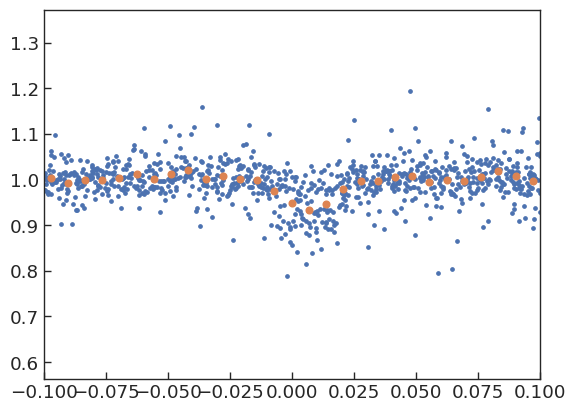

In [28]:
period = 3.3079817 #± 0.0006559
t0 = 2459685.753346 #± 0.0018235 
# t,f,e = phase_fold(lc_tess.BJD_TDB.values-t0, lc_tess.Flux.values, lc_tess.Err.values, period)

t = lc_tess.BJD_TDB.values
p = ((((t-t0) / period) - 0.5) % 1) - 0.5
f = lc_tess.Flux.values
e = lc_tess.Err.values
t2,f2,e2 = binning_equal_interval(p, f, e, binsize=10/60/24, t0=t0)
pl.plot(p, f, '.')
pl.plot(t2, f2, 'o')
pl.xlim(-.1,0.1)

In [29]:
def get_epoch_number(times, period, t0):
    return int(np.floor((max(times)-t0)/period))

In [30]:
t = lcs['V']['lco1m'].BJD_TDB.values
n = get_epoch_number(t, period, t0)
tc = t0+n*period
t-tc

array([-9.46656992e-02, -8.97036628e-02, -8.47066259e-02, -7.97465895e-02,
       -7.47555541e-02, -6.97945175e-02, -6.48264815e-02, -5.98194436e-02,
       -5.48514072e-02, -4.98893713e-02, -4.49163350e-02, -3.99512998e-02,
       -3.49552627e-02, -2.48811906e-02, -1.99181540e-02, -1.49011174e-02,
       -9.93608125e-03, -4.97404533e-03,  3.59904952e-05,  5.00202645e-03,
        9.99506237e-03,  1.49740987e-02,  1.99521328e-02,  2.49191690e-02,
        2.99072061e-02,  3.48682418e-02,  3.98282763e-02,  4.47883122e-02,
        4.97663482e-02,  5.47343832e-02])

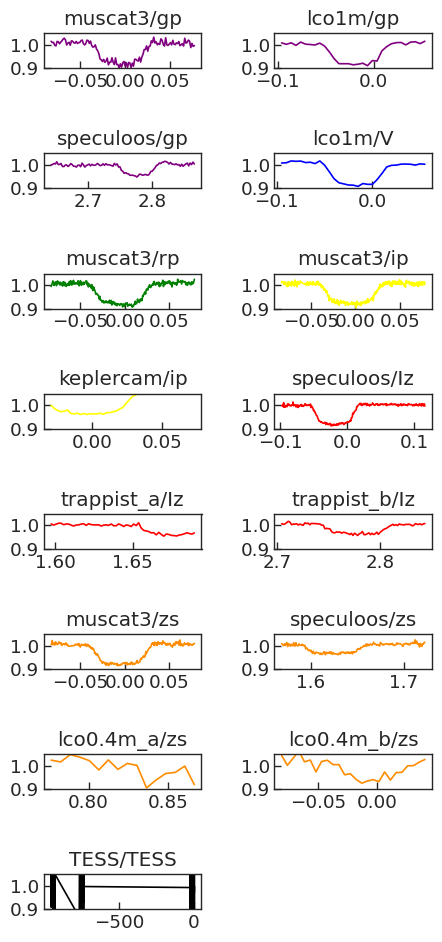

In [41]:
fig = pl.figure(figsize=(5,10))
i = 0
for band,data in lcs.items():
    for inst,lc in data.items():
        ax = fig.add_subplot(ndatasets//2+1,2,1+i)

        t = lc.BJD_TDB
        f = lc.Flux/np.median(lc.Flux)
        n = get_epoch_number(t, period, t0)
        tc = t0+n*period
        ax.plot(t-tc, f, color=colors[band])
        ax.set_title(f'{inst}/{band}')
        i+=1
        ax.set_ylim(0.9, 1.05)
fig.tight_layout()

* Tc
* period
* r1 --> b
* r2 --> k
* q1,q2 for each band (2x7)
* d for each lc (10)

## Filter profiles
* http://svo2.cab.inta-csic.es/svo/theory/fps3/index.php
* MuSCAT2: https://drive.google.com/drive/folders/1cnpqIF7MxLies8xGt2-OH8OOfQ9aJ7_a

In [55]:
from astropy.io import ascii

def get_filter_profile(url):
    df = ascii.read(url).to_pandas()
    df.columns = ['wav','trans']
    return df

In [56]:
urls = {
    'V': 'http://svo2.cab.inta-csic.es/svo/theory/fps3/getdata.php?format=ascii&id=LasCumbres/LasCumbres.Bessel_V',
    'gp': 'http://svo2.cab.inta-csic.es/svo/theory/fps3/getdata.php?format=ascii&id=SLOAN/SDSS.gprime_filter',
    'rp': 'http://svo2.cab.inta-csic.es/svo/theory/fps3/getdata.php?format=ascii&id=SLOAN/SDSS.rprime_filter',
    'ip': 'http://svo2.cab.inta-csic.es/svo/theory/fps3/getdata.php?format=ascii&id=SLOAN/SDSS.iprime_filter',
    # 'i': 'http://svo2.cab.inta-csic.es/svo/theory/fps3/getdata.php?format=ascii&id=FLWO/KeplerCam.i',
    # 'z': 'http://svo2.cab.inta-csic.es/svo/theory/fps3/getdata.php?format=ascii&id=SLOAN/SDSS.z',
    'zs': 'http://svo2.cab.inta-csic.es/svo/theory/fps3/getdata.php?format=ascii&id=LasCumbres/LasCumbres.PS_z',
    'Iz': 'http://svo2.cab.inta-csic.es/svo/theory/fps3/getdata.php?format=ascii&id=SPECULOOS/SPECULOOS_S.iz',
    'TESS': 'http://svo2.cab.inta-csic.es/svo/theory/fps3/getdata.php?format=ascii&id=TESS/TESS.Red',
}

In [57]:
profiles = {}
for band,url in urls.items():
    if band not in profiles.keys():
        df = get_filter_profile(url)
        profiles[band] = df

V: 484.0,606.4
gp: 391.4,556.3
rp: 546.0,703.4
ip: 682.9,860.0
zs: 811.0,927.5
Iz: 716.3397,1034.5211
TESS: 585.0,1056.0
gp: 401.5,552.5
rp: 562.5,697.5
ip: 705.0,817.5
zs: 825.0,922.5


Text(0.5, 1.0, 'Filter profiles')

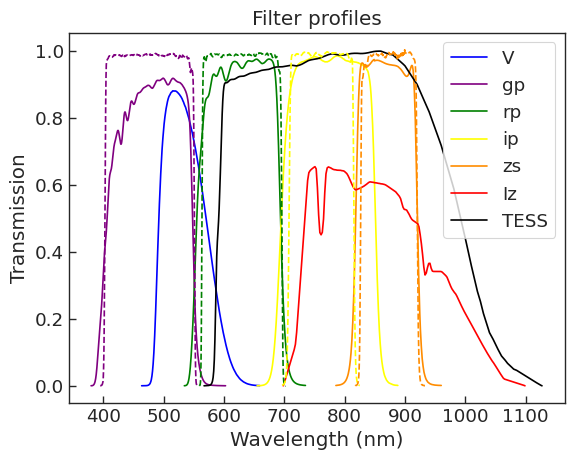

In [65]:
filter_widths = {}
for band,df in profiles.items():
    wav = df.wav/10
    trans = df.trans
    idx = trans>0.1
    print(f"{band}: {wav[idx].min()},{wav[idx].max()}")
    filter_widths[band] = (wav[idx].min(), wav[idx].max())
    pl.plot(wav, trans, label=band, color=colors[band])

#superpose muscat filters
muscat2 = pd.read_csv('../data/photometry/filters/TP_MuSCAT2.csv')
muscat2 = muscat2.rename({
    'Filter_g': 'gp',
    'Filter_r': 'rp',
    'Filter_i': 'ip',
    'Filter_z': 'zs'
    }, axis=1
)
for band in ['gp','rp','ip','zs']:
    wav = muscat2['wavelength']
    trans = muscat2[band]
    idx = trans>0.1
    print(f"{band}: {wav[idx].min()},{wav[idx].max()}")
    filter_widths[band] = (wav[idx].min(), wav[idx].max())
    pl.plot(wav, trans, color=colors[band], ls='--')
pl.legend()
pl.xlabel('Wavelength (nm)')
pl.ylabel('Transmission')
pl.title('Filter profiles')

In [66]:
filter_widths

{'V': (484.0, 606.4),
 'gp': (401.5, 552.5),
 'rp': (562.5, 697.5),
 'ip': (705.0, 817.5),
 'zs': (825.0, 922.5),
 'Iz': (716.3397, 1034.5211),
 'TESS': (585.0, 1056.0)}

In [75]:
from ldtk import LDPSetCreator, BoxcarFilter

filters = []
for band in filter_widths:
    filter = BoxcarFilter(band, *filter_widths[band])
    filters.append(filter)
    
sc = LDPSetCreator(teff=(3380,157),
                   logg=(4.82,0.00),
                   z=(0.00,0.10),
                   filters=filters)    # FTP server automatically.

ps = sc.create_profiles()                # Create the limb darkening profiles
cq,eq = ps.coeffs_qd(do_mc=True)         # Estimate quadratic law coefficients

In [76]:
cq

array([[0.5474963 , 0.27849709],
       [0.52240439, 0.30151532],
       [0.52222044, 0.26263276],
       [0.31879468, 0.29881815],
       [0.24331988, 0.28547272],
       [0.24203679, 0.26659062],
       [0.27163157, 0.25778605]])